[**Demo %s**](#demo-rk-converge)

We solve the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$.

In [60]:
ivp = ode;
ivp.ODEFcn = @(t, u, p) sin((t + u)^2);
ivp.InitialValue = -1;
a = 0;  b = 4;

We use a built-in solver to construct an accurate approximation to the exact solution.

In [61]:
ivp.AbsoluteTolerance = 1e-13;
ivp.RelativeTolerance = 1e-13;
u_ref = solutionFcn(ivp, a, b);

Now we perform a convergence study of our two Runge–Kutta implementations.

In [62]:
n = round(2 * 10.^(0:0.5:3)');
err = zeros(length(n), 2);
for i = 1:length(n)
    [t, u] = ie2(ivp, a, b, n(i));
    err(i, 1) = norm(u_ref(t) - u, Inf);
    [t, u] = rk4(ivp, a, b, n(i));
    err(i, 2) = norm(u_ref(t) - u, Inf);
end

disp(table(n, err(:, 1), err(:, 2), variableNames=["n", "IE2 error", "RK4 error"]))

     n      IE2 error     RK4 error 
    ____    __________    __________

       2         1.769       0.82065
       6       0.51268       0.79192
      20      0.024059    0.00081269
      63     0.0022533    8.0622e-06
     200    0.00022242    7.6066e-08
     632    2.2253e-05     7.515e-10
    2000    2.2218e-06    7.6541e-12



The amount of computational work at each time step is assumed to be proportional to the number of stages. Let's compare on an apples-to-apples basis by using the number of $f$-evaluations on the horizontal axis.

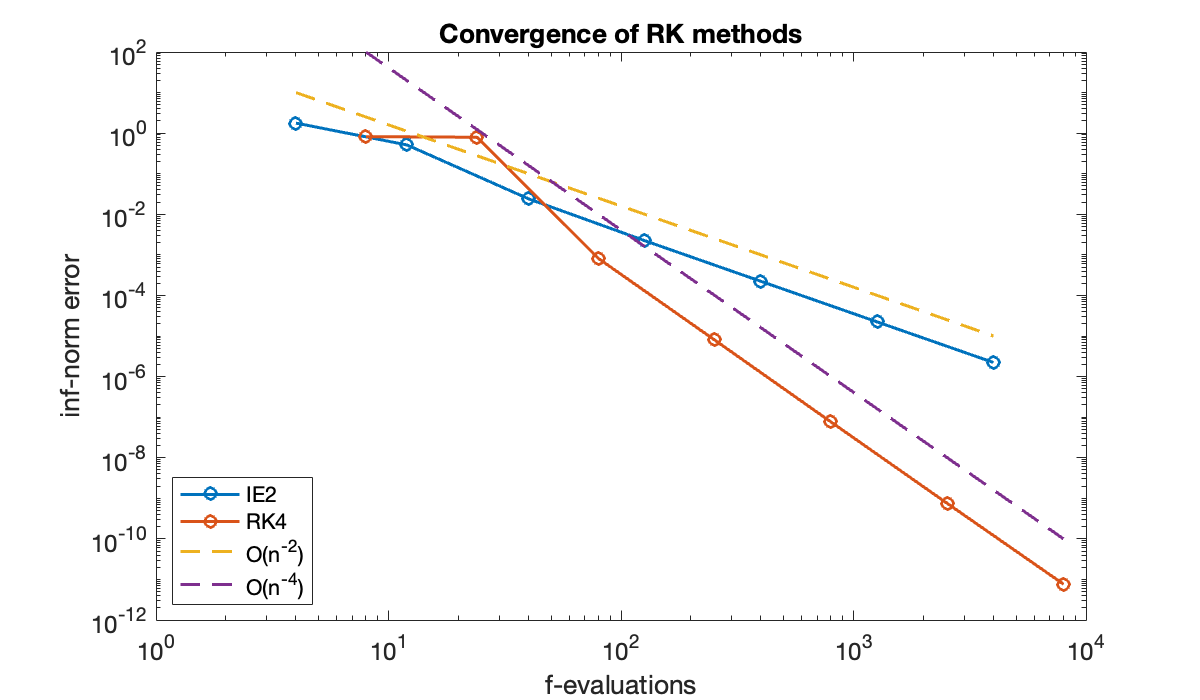

In [63]:
clf, loglog([2*n 4*n], err, '-o')
hold on
loglog(2*n, 1e-5 * (n / n(end)) .^ (-2), '--')
loglog(4*n, 1e-10 * (n / n(end)) .^ (-4), '--')
xlabel("f-evaluations");  ylabel("inf-norm error")
title("Convergence of RK methods")
legend("IE2", "RK4", "O(n^{-2})", "O(n^{-4})", "location", "southwest");

The fourth-order variant is more efficient in this problem over a wide range of accuracy.